In [2]:
library('igraph')
library('Matrix')
library('pracma')

Problem 1.1
===

problem1.1(a)
---

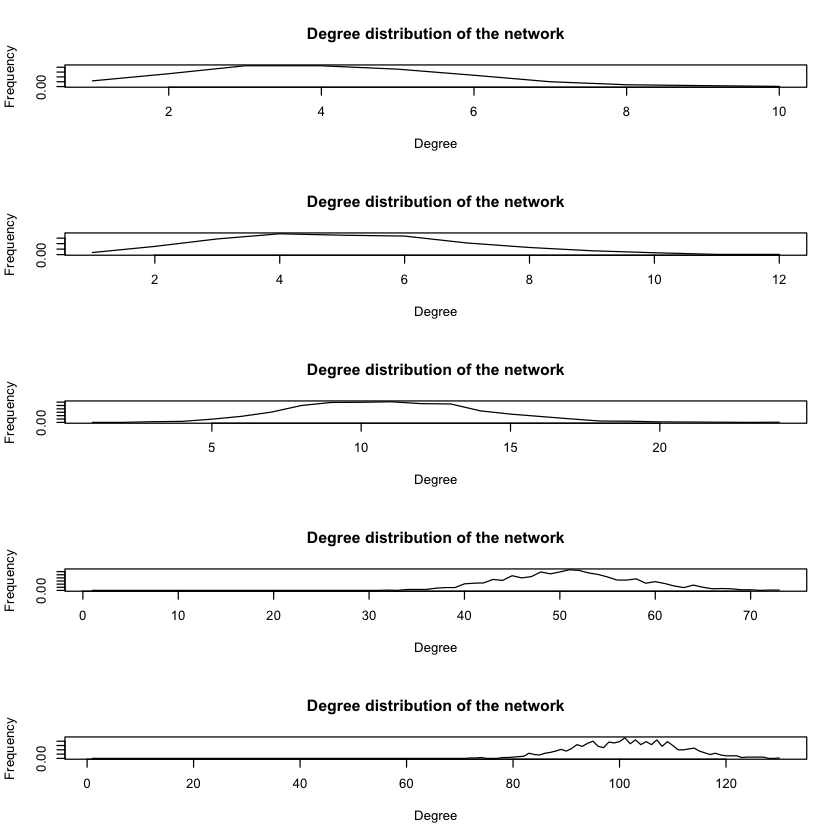

In [111]:
par(mfrow=c(5,1)) 
for (i in c(0.003,0.004,0.01,0.05,0.1)){
    p <- i
    g <- erdos.renyi.game(1000, p, directed=F)
    #plot(g,vertex.size=0.5, vertex.label.cex=0.001)
    plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",type="l")
}

problem1.1(b)
---

In [26]:
for (i in c(0.003,0.004,0.01,0.05,0.1)){
    p <- i
    g <- erdos.renyi.game(1000, p, directed=F)
    print(diameter(g, directed = F, unconnected = TRUE))
}

[1] 15
[1] 11
[1] 5
[1] 3
[1] 3


problem1.1(c)
---

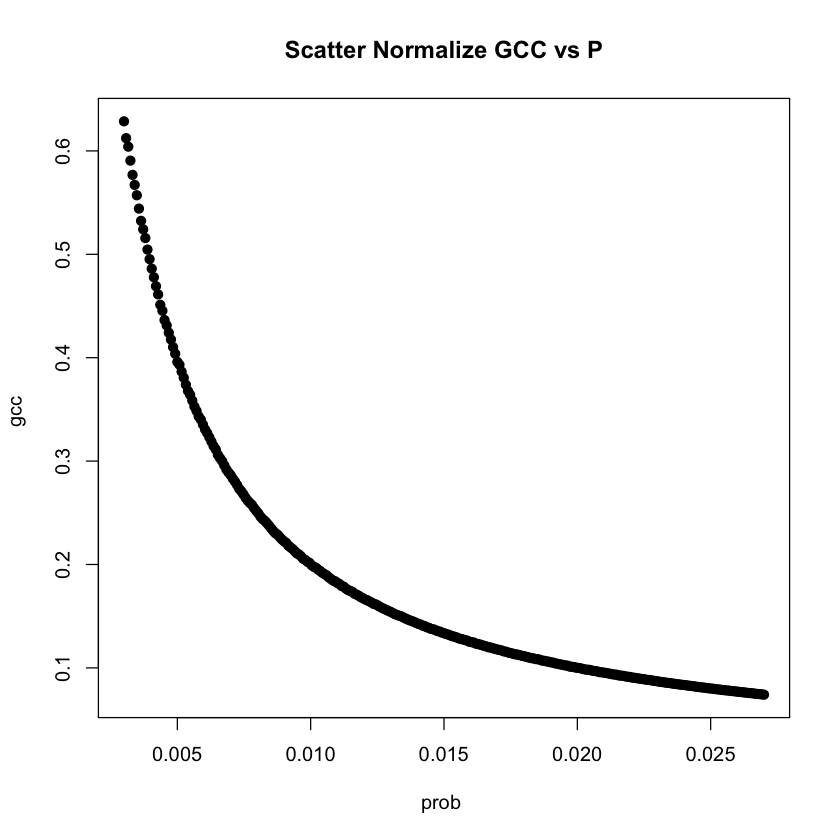

In [150]:
res_gcc = c() 
prob = seq(0.003,0.027,0.00008)
for (i in 1:301){
    frac_set <- c()
    prob_c = prob[i]
    for (j in 1:101){        
        g <- erdos.renyi.game(1000, prob_c, directed=F)
        clu <- components(g)
        gcc_size <- max(clu$csize)
        frac_set[j] <- gcc_size/gsize(g)
    }
    frac <- mean(frac_set)
    res_gcc[i] <- frac
}

plot(prob, res_gcc, main="Scatter Normalize GCC vs P", xlab="prob ", ylab="gcc ", pch=19)

problem1.1(d)
---

[1]   1 100
[1]   1 100


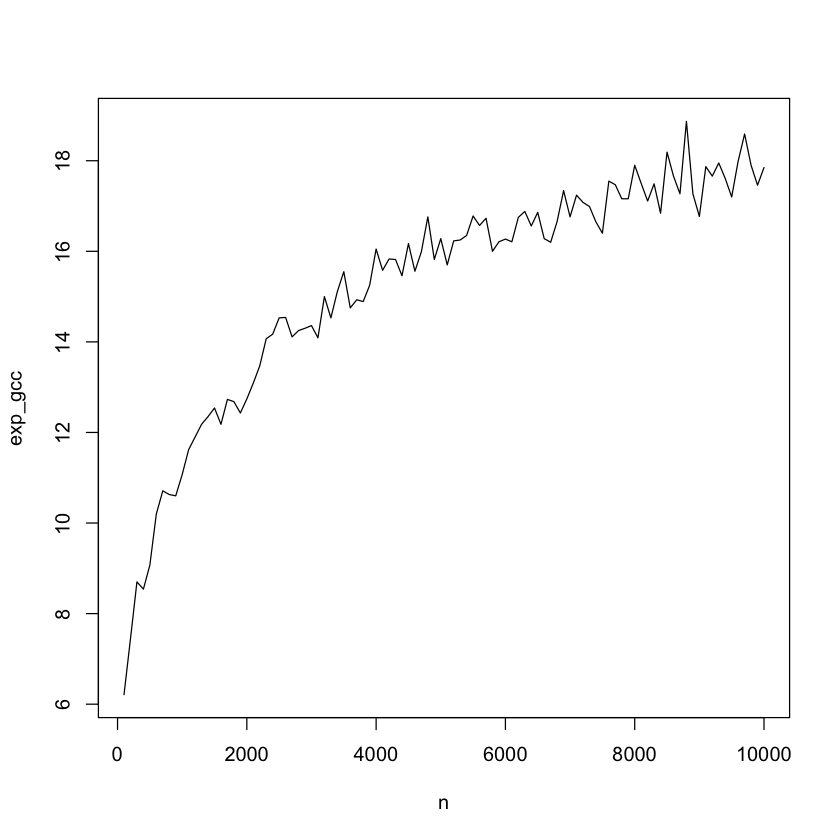

In [145]:
exp_gcc <- c()
n <- seq(100,10000,100)
for (i in 1:100){
    n_c <- n[i]
    p <- 0.5/n_c
    avg_gcc <- c()
    for(j in 1:100){        
        g <- erdos.renyi.game(n_c, p, directed=F)
        clu <- components(g)
        avg_gcc[j] <- max(clu$csize)
    }
    exp_gcc[i] <- mean(avg_gcc)
}
print(size(n))
print(size(exp_gcc))
plot(n,exp_gcc,type='l')


[1]   1 100
[1]   1 100


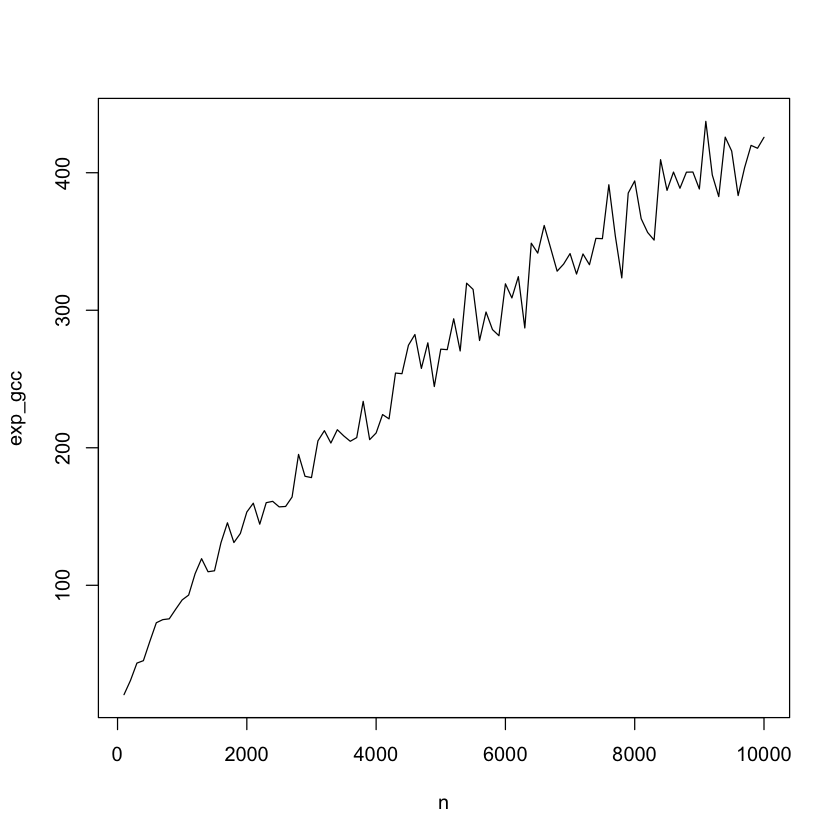

In [146]:
exp_gcc <- c()
n <- seq(100,10000,100)
for (i in 1:100){
    n_c <- n[i]
    p <- 1/n_c
    avg_gcc <- c()
    for(j in 1:100){        
        g <- erdos.renyi.game(n_c, p, directed=F)
        clu <- components(g)
        avg_gcc[j] <- max(clu$csize)
    }
    exp_gcc[i] <- mean(avg_gcc)
}
print(size(n))
print(size(exp_gcc))
plot(n,exp_gcc,type='l')

Loading required package: ggplot2

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:igraph’:

    groups

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



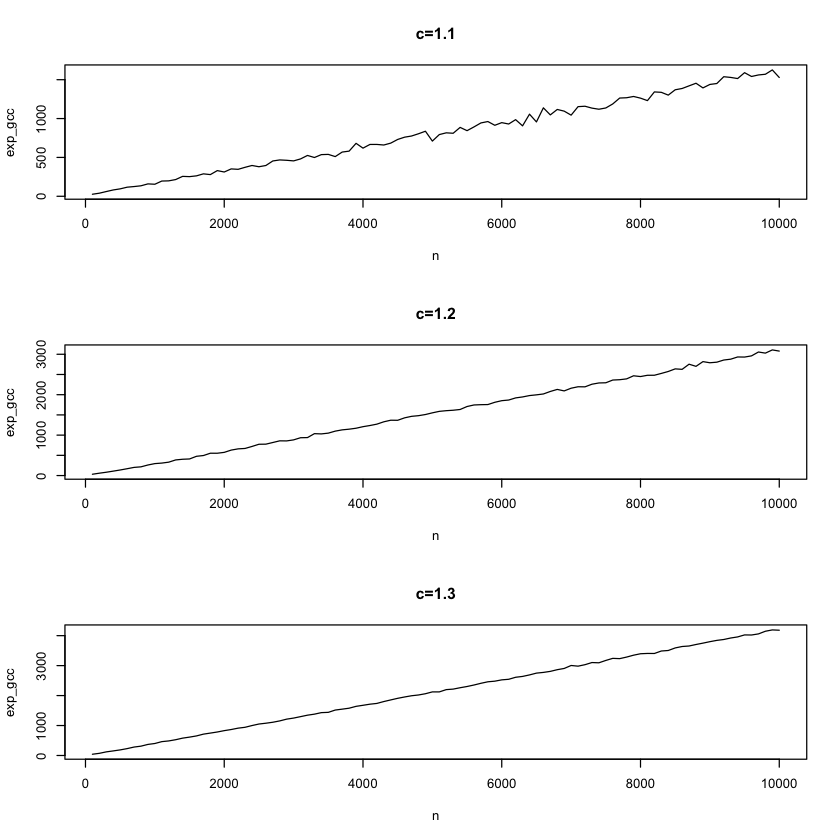

In [147]:
library(plotly)

par(mfrow=c(3,1)) 
exp_gcc <- c()
n <- seq(100,10000,100)
for (i in 1:100){
    n_c <- n[i]
    p <- 1.1/n_c
    avg_gcc <- c()
    for(j in 1:100){        
        g <- erdos.renyi.game(n_c, p, directed=F)
        clu <- components(g)
        avg_gcc[j] <- max(clu$csize)
    }
    exp_gcc[i] <- mean(avg_gcc)
}
plot(n,exp_gcc,type='l',main="c=1.1")

exp_gcc <- c()
for (i in 1:100){
    n_c <- n[i]
    p <- 1.2/n_c
    avg_gcc <- c()
    for(j in 1:100){        
        g <- erdos.renyi.game(n_c, p, directed=F)
        clu <- components(g)
        avg_gcc[j] <- max(clu$csize)
    }
    exp_gcc[i] <- mean(avg_gcc)
}
plot(n,exp_gcc,type='l',main="c=1.2")

exp_gcc <- c()
for (i in 1:100){
    n_c <- n[i]
    p <- 1.3/n_c
    avg_gcc <- c()
    for(j in 1:100){        
        g <- erdos.renyi.game(n_c, p, directed=F)
        clu <- components(g)
        avg_gcc[j] <- max(clu$csize)
    }
    exp_gcc[i] <- mean(avg_gcc)
}
plot(n,exp_gcc,type='l',main="c=1.3")


Problem1.2
===

problem1.2(a)
---

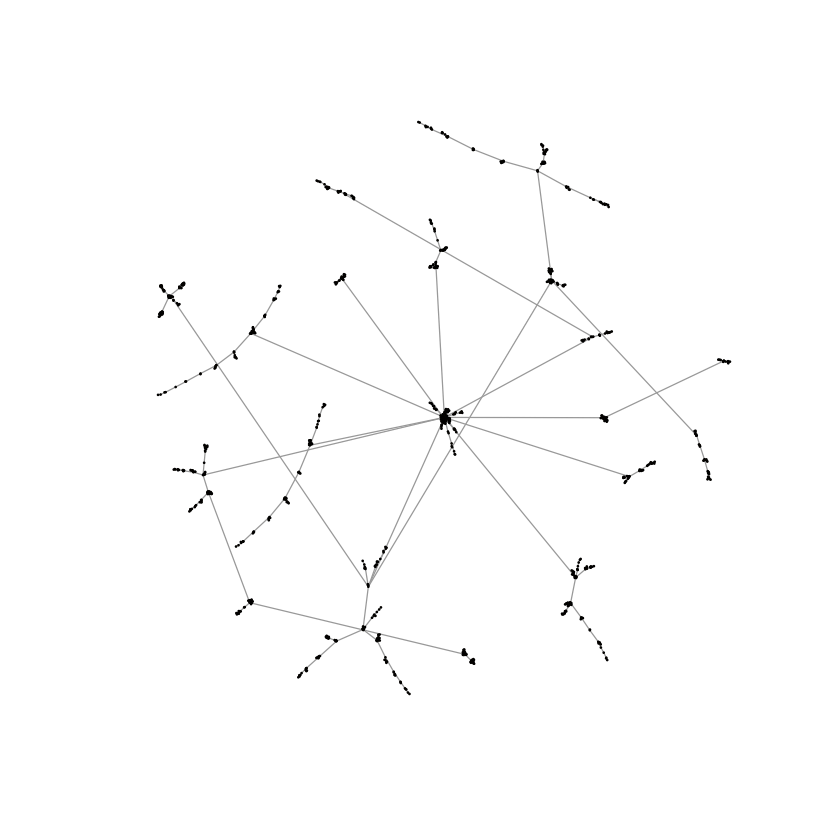

In [4]:
g <- barabasi.game(1000, m=1, directed=F)
plot(g,vertex.size=0.5, vertex.label.cex=0.001)

problem1.2(b)
---

In [9]:
fg <- fastgreedy.community(g)
modularity(g,membership(fg))

[1] 0.928968

problem1.2(c)
---

In [10]:
g <- barabasi.game(10000, m=1, directed=F)
fg <- fastgreedy.community(g)
modularity(g,membership(fg))

[1] 0.9777157

problem1.2(d)
---

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“22 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“27 y values <= 0 omitted from logarithmic plot”

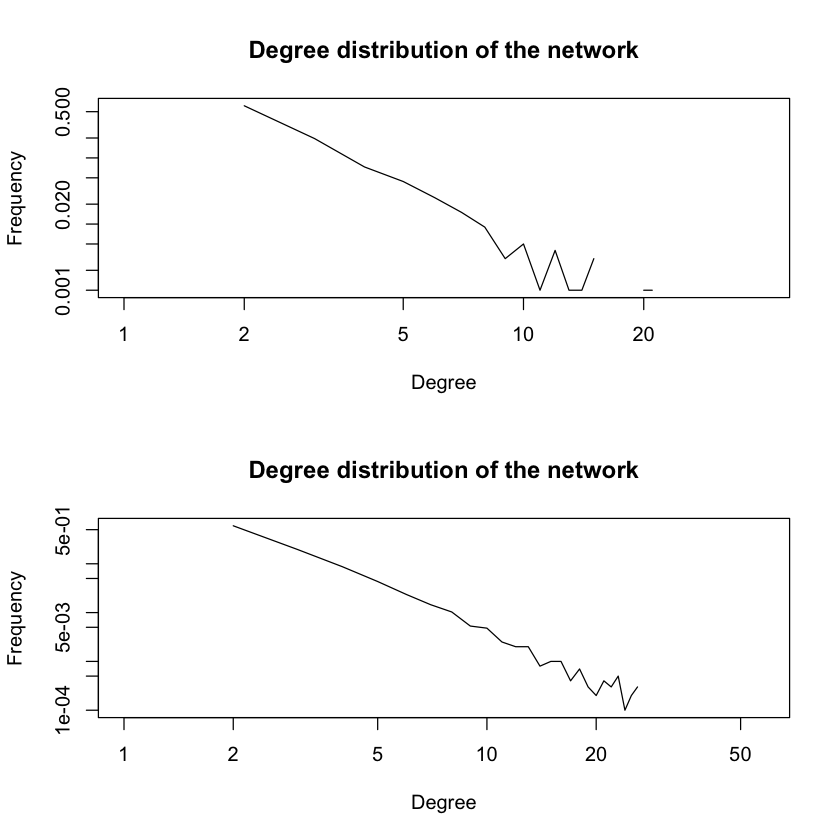

In [177]:
par(mfrow=c(2,1))

g <- barabasi.game(1000, m=1, directed=F)
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log="xy",type="l")
g <- barabasi.game(10000, m=1, directed=F)
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log="xy",type="l")


problem1.2(e)
---

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“43 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“25 y values <= 0 omitted from logarithmic plot”

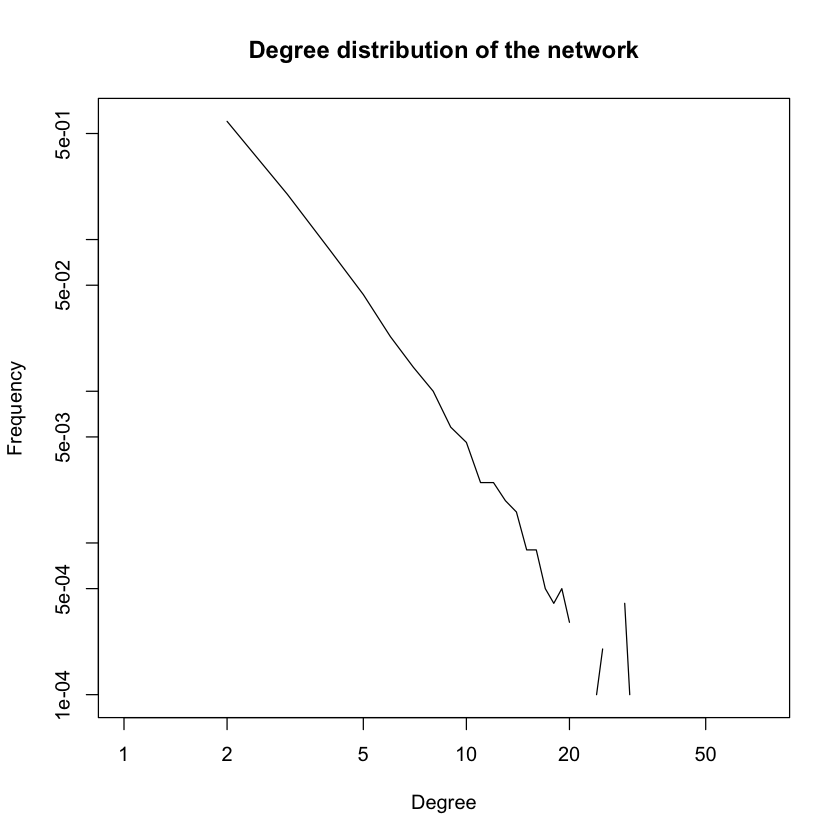

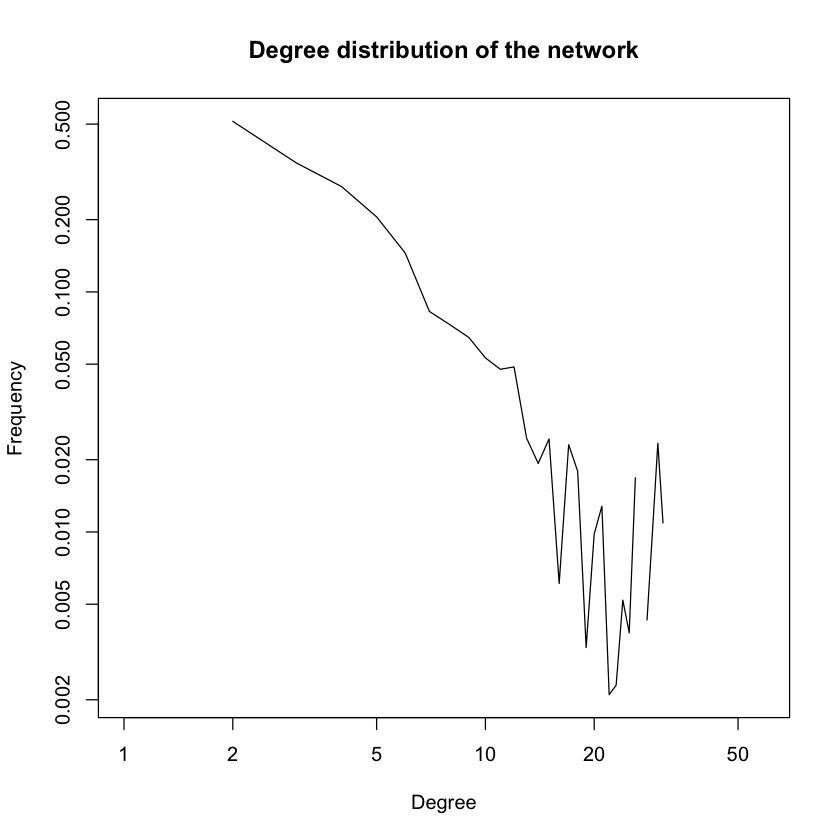

In [187]:
g <- barabasi.game(10000, m=1, directed=F)
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log="xy",type="l")

g <- barabasi.game(10000, m=1, directed=F)
degrees <- degree(g)

set.seed(3)
points <- sample(vcount(g), 30000, replace = TRUE)
num_d <- rep(0,max(degree(g))+1)
dis_d <- rep(0,max(degree(g))+1)
for (point in points){
    neighbs <- neighbors(g,point)
    neighb <- sample(neighbs,1)
    degree <- degrees[neighb]
    num_d[degree] <- num_d[degree]+1
}

length <- 1:(max(degree(g))+1)

dis_d[1] = 0
for (i in 2:(max(degree(g))+1)){
    dis_d[i] <- num_d[i]/vcount(g)
}
plot(length,dis_d,main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log="xy",type="l")

problem1.2(f)
---

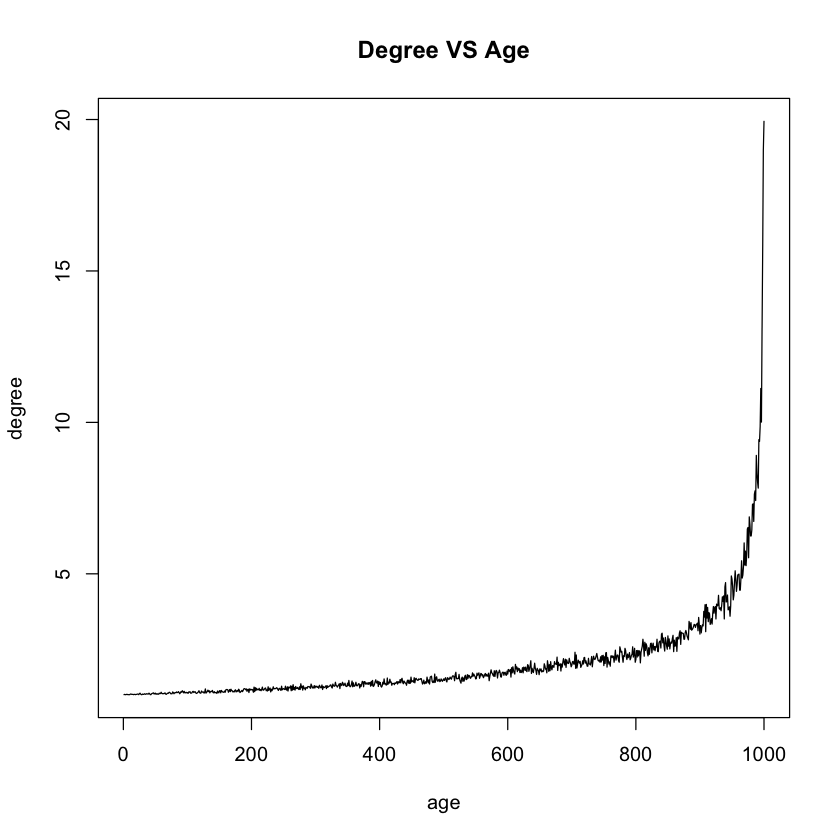

In [188]:
g <- barabasi.game(1000, m=1, directed=F)
deg <- degree(g)
for(i in 1:100){
    g <- barabasi.game(1000, m=1, directed=F)
    deg <- degree(g)+deg
}
plot(1000:1,deg/100,main="Degree VS Age",xlab="age",ylab="degree",type="l")

problem1.2(g)
---

In [189]:
myfunc <- function(m=1){              # for easy use of m
    g <- barabasi.game(1000, m=m, directed=F)
    plot(g,vertex.size=0.5, vertex.label.cex=0.001)
    fg <- fastgreedy.community(g)
    print(modularity(g,membership(fg)))
    
    g <- barabasi.game(10000, m=m, directed=F)
    fg <- fastgreedy.community(g)
    print(modularity(g,membership(fg)))
    
    par(mfrow=c(2,1))

    g <- barabasi.game(1000, m=m, directed=F)
    plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log="xy",type="l")
    g <- barabasi.game(10000, m=m, directed=F)
    plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log="xy",type="l")

    
    g <- barabasi.game(10000, m=m, directed=F)
    degrees <- degree(g)

    set.seed(3)
    points <- sample(vcount(g), 30000, replace = TRUE)
    num_d <- rep(0,max(degree(g))+1)
    dis_d <- rep(0,max(degree(g))+1)
    for (point in points){
        neighbs <- neighbors(g,point)
        neighb <- sample(neighbs,1)
        degree <- degrees[neighb]
        num_d[degree] <- num_d[degree]+1
    }

    length <- 1:(max(degree(g))+1)

    dis_d[1] = 0
    for (i in 2:(max(degree(g))+1)){
        dis_d[i] <- num_d[i]/vcount(g)
    }
    plot(length,dis_d,main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log="xy",type="l")
    
    
    g <- barabasi.game(1000, m=m, directed=F)
    deg <- degree(g)
    for(i in 1:100){
        g <- barabasi.game(1000, m=m, directed=F)
        deg <- degree(g)+deg
    }
    plot(1000:1,deg/100,main="Degree VS Age",xlab="age",ylab="degree",type="l")
}



[1] 0.5156836
[1] 0.5314284


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“57 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“132 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“101 y values <= 0 omitted from logarithmic plot”

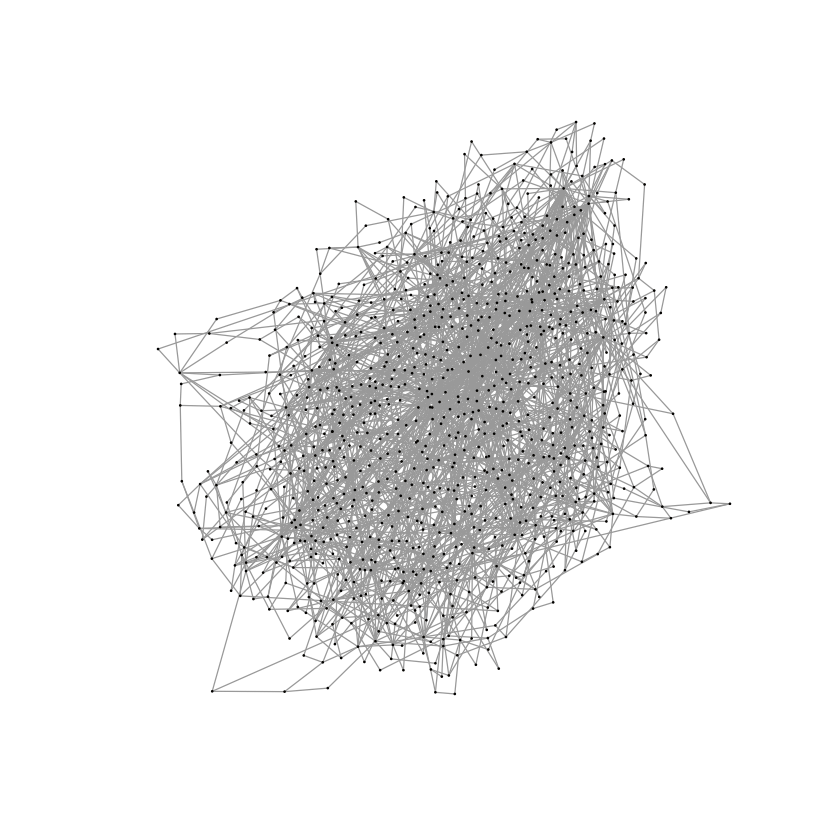

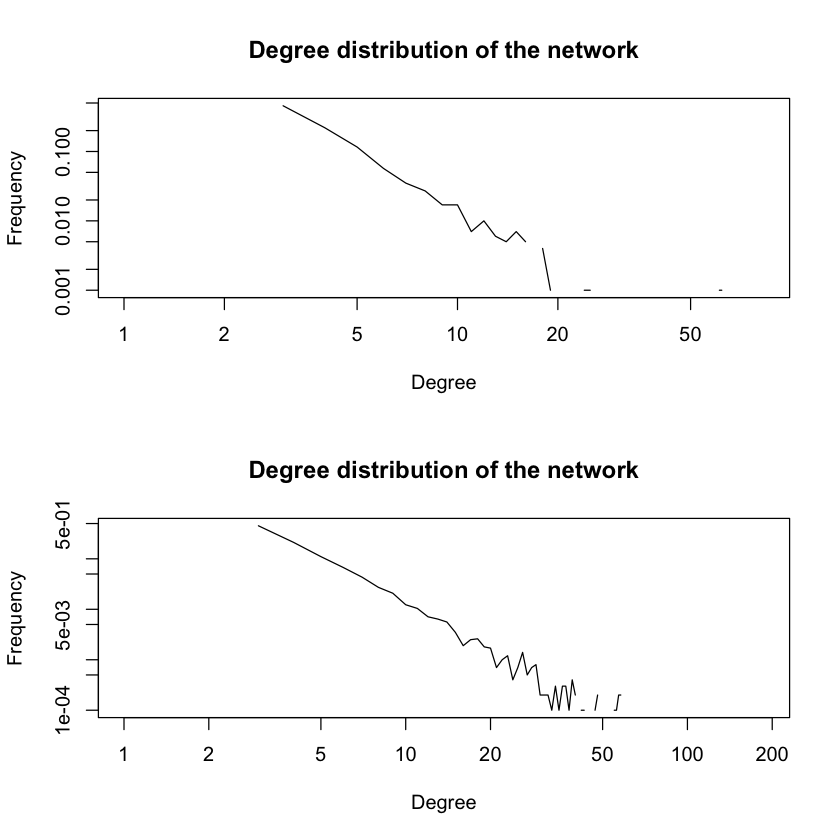

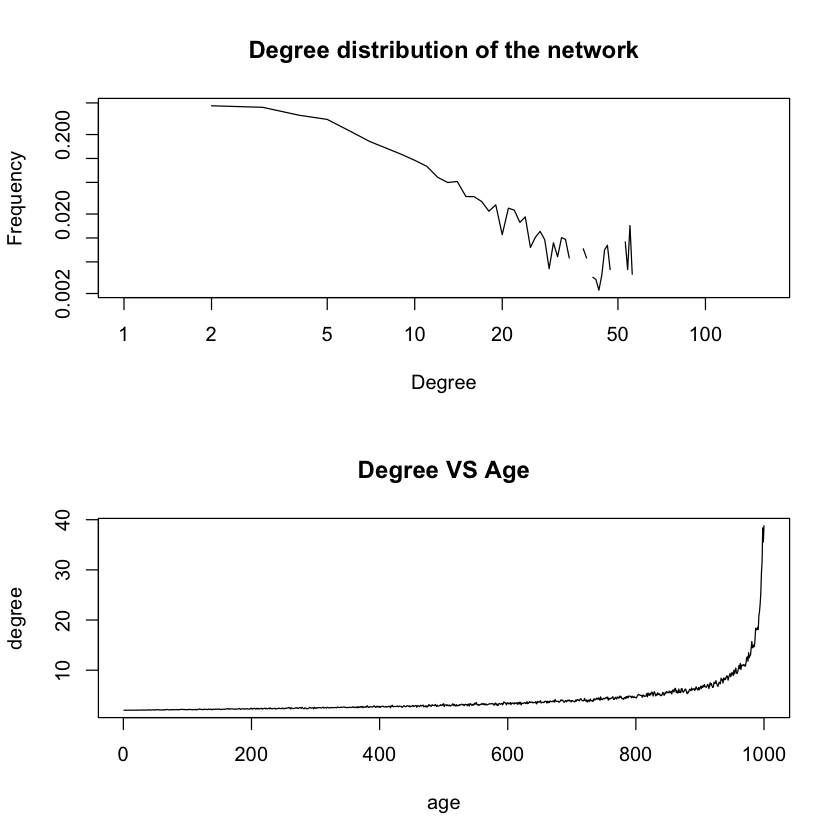

In [190]:
myfunc(2)

[1] 0.2808354
[1] 0.2739036


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“49 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“185 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“184 y values <= 0 omitted from logarithmic plot”

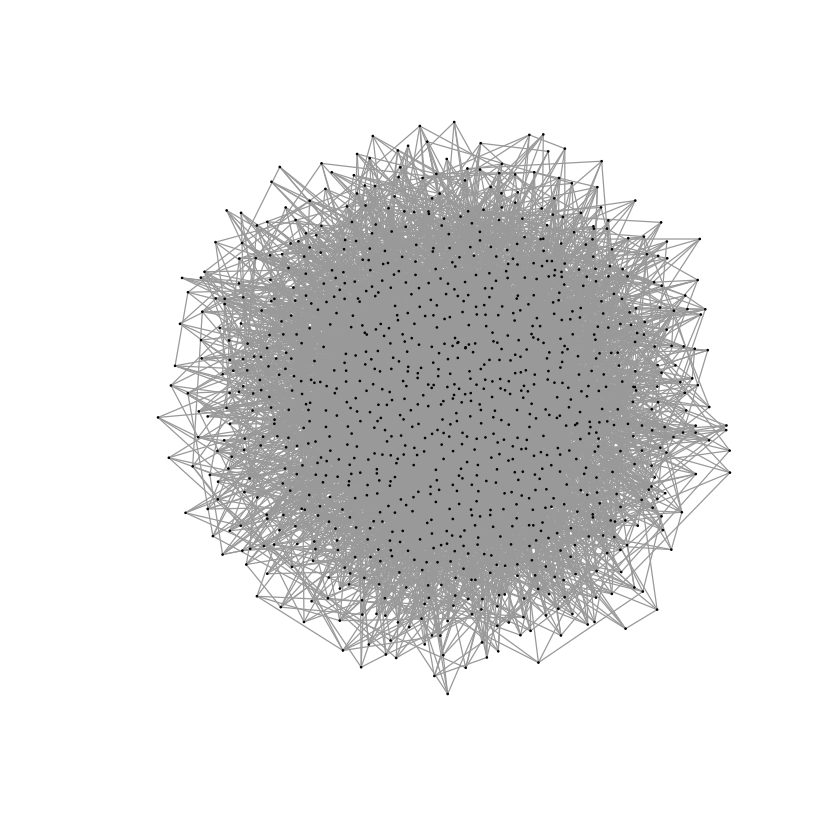

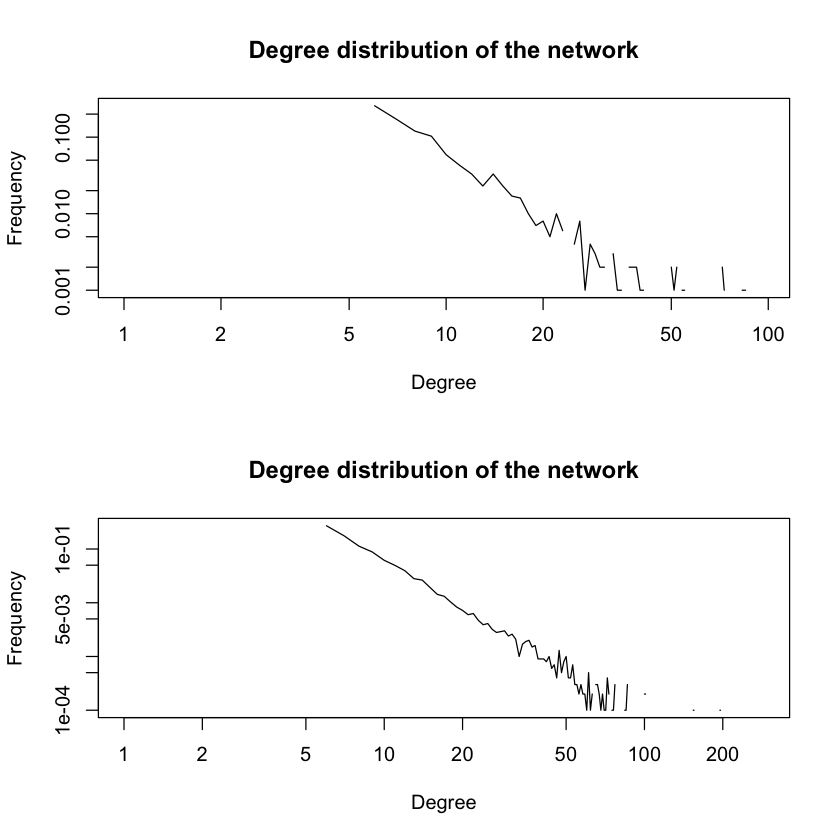

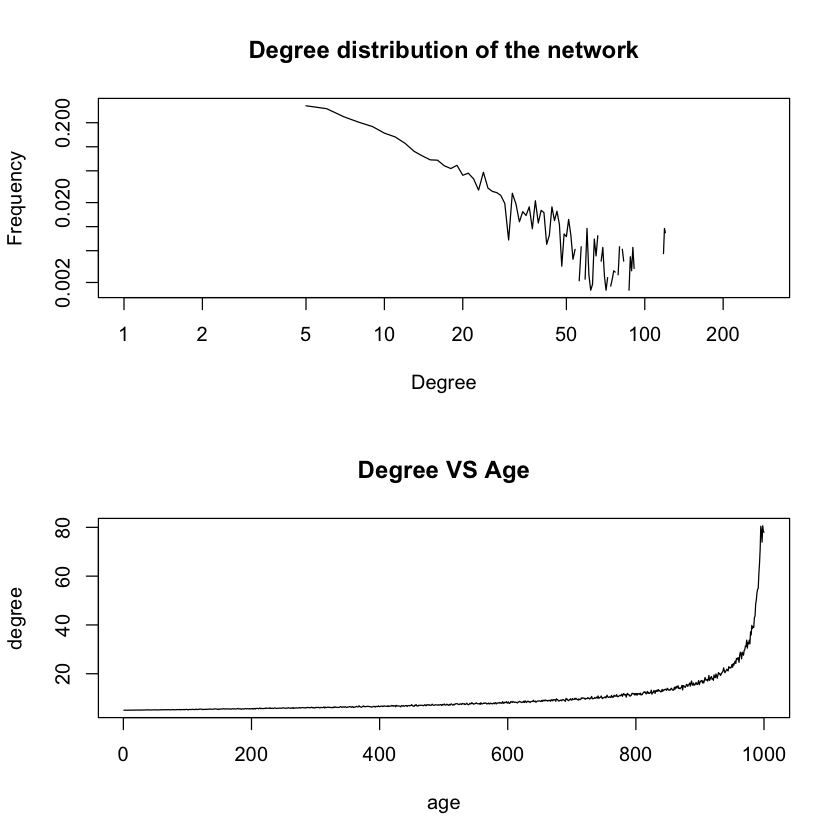

In [191]:
myfunc(5)

problem1.2(h)
---

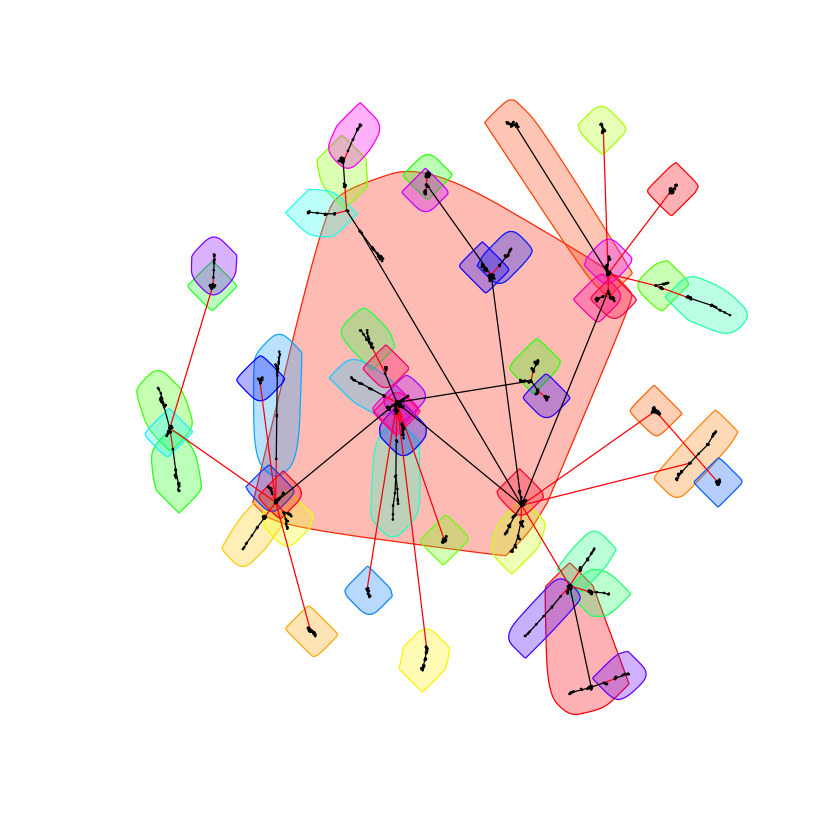

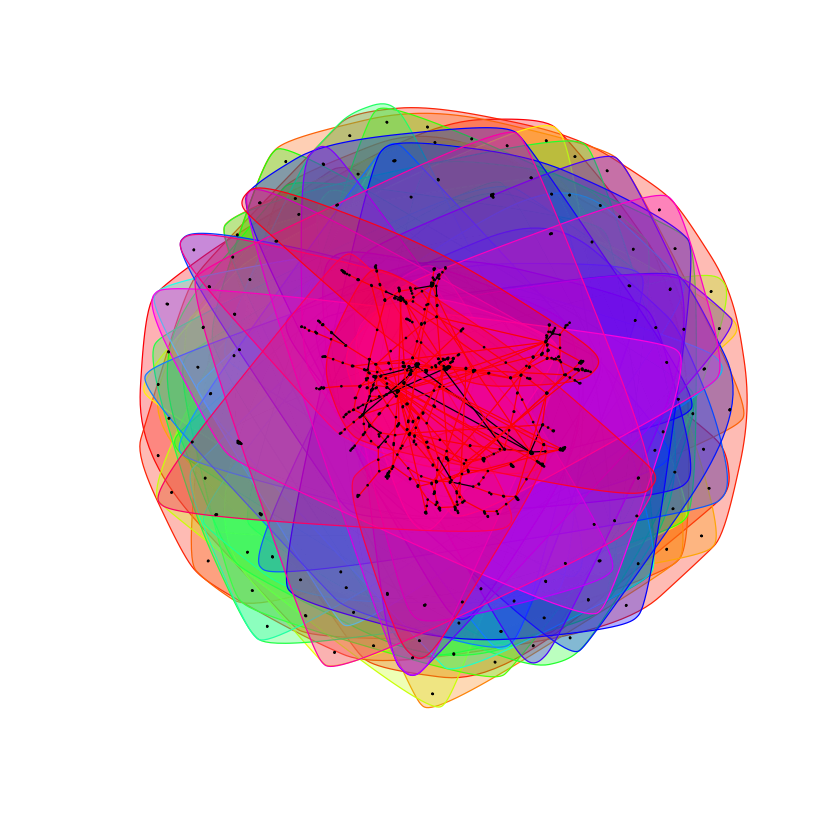

In [197]:
g <- barabasi.game(1000, m=1, directed=F)
wc <- walktrap.community(g)
plot(wc,g,vertex.size=0.5, vertex.label.cex=0.001)

deg <- sort(degree(g),decreasing = T)
g1 <- sample_degseq(deg,method = "simple.no.multiple")
wc <- walktrap.community(g)
plot(wc,g1,vertex.size=0.5, vertex.label.cex=0.001)